In [2]:
import matplotlib.pyplot as plt
import time 
import numpy as np
from astropy.io import fits
import os

In [12]:
directorio='/Users/oscar/Documents/Documentos/Docs/LME/CCD/OscuraImagenes/'
contenido = os.listdir(directorio)
hdulist = fits.open(directorio+contenido[4])
scidata = hdulist[4].data


In [13]:
scidata.shape


(100, 134400)

In [14]:
img_individual= np.zeros((100, 1200))
img_total= np.zeros((100, 134400))

In [16]:
st = time.time()
for item in range(0,len(contenido)):
    hdulist = fits.open(directorio+contenido[item])
    scidata = hdulist[4].data
    for i in range(0,112):
        for k in range (0,1200):
            img_total[:,k+i]=scidata[:,(k*112)+i]
    #plt.figure()
    #plt.imshow(img_total, cmap='gray')
    #plt.colorbar()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

ValueError: could not broadcast input array from shape (1300,) into shape (100,)

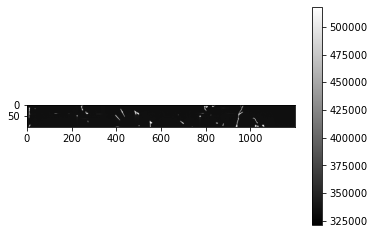

In [22]:
for k in range (0,1200):
    img_individual[:,k]=scidata[:,(k*112)+5]
plt.figure()
plt.imshow(img_individual, cmap='gray')
plt.colorbar()

In [4]:
a='abc'
b='cde'
print(a+b)

abccde
